In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [2]:
df_1 = pd.read_csv('divisions daily weather.csv')

# Data Cleaning and Feature Engineering 

In [3]:
sylhet_daily_weather = df_1[df_1['Division'] == 'Sylhet']

In [4]:
sylhet_daily_weather.head(5)

,cloudcover,conditions,Year,Quarter,Month,Day,DayType,description,dew,Division,...,Month.2,Day.2,temp,tempmax,tempmin,uvindex,visibility,winddir,windgust,windspeed
0,0.0,Clear,2013,Qtr 1,January,1,No rain,Clear conditions throughout the day.,50.9,Sylhet,...,January,1,60.8,73.8,47.4,6,1.6,208.4,NaN,6.0
2,0.0,Clear,2013,Qtr 1,January,2,No rain,Clear conditions throughout the day.,53.0,Sylhet,...,January,2,62.9,75.6,50.8,7,1.9,203.8,NaN,7.2
8,0.0,Clear,2013,Qtr 1,January,6,No rain,Clear conditions throughout the day.,50.8,Sylhet,...,January,6,60.4,74.2,46.5,6,2.2,234.5,NaN,5.8
15,0.0,Clear,2013,Qtr 1,January,13,No rain,Clear conditions throughout the day.,48.8,Sylhet,...,January,13,59.4,73.5,43.1,7,2.0,204.2,NaN,6.5
18,0.0,Clear,2013,Qtr 1,January,14,No rain,Clear conditions throughout the day.,51.1,Sylhet,...,January,14,61.8,75.8,48.5,7,2.4,122.1,NaN,6.5


In [5]:
sylhet_daily_weather_sorted = sylhet_daily_weather.sort_values(by=['Year','Month','Day'])

In [6]:
print(sylhet_daily_weather_sorted['Day'].min())
print(sylhet_daily_weather_sorted['Day'].max())

1
31


In [7]:
month_dict = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
              'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}


In [8]:
# Convert month names to numeric values
sylhet_daily_weather_sorted['Month'] = sylhet_daily_weather_sorted['Month'].map(month_dict)

In [9]:
sylhet_daily_weather_sorted['Date'] = pd.to_datetime(sylhet_daily_weather_sorted[['Year', 'Month', 'Day']])

In [10]:
sylhet_daily_weather_Date = sylhet_daily_weather_sorted

In [11]:
# 1 = Flood = False
# 0 = Flood = True

sylhet_daily_weather_Date.loc[:, 'Flood'] = sylhet_daily_weather_Date.loc[:, 'Flood'].astype(int)

In [12]:
# Check the value at a specific index and column
index_to_check = 2  
column_to_check = 'Date'  

value = sylhet_daily_weather_Date.loc[index_to_check, column_to_check]

# Display the result
print(f"\nValue at index {index_to_check} and column '{column_to_check}': {value}")


Value at index 2 and column 'Date': 2013-01-02 00:00:00


In [13]:
# Check the value at a specific index and column
index_to_check = 2  
column_to_check = 'Flood'  

value = sylhet_daily_weather_sorted.loc[index_to_check, column_to_check]

# Display the result
print(f"\nValue at index {index_to_check} and column '{column_to_check}': {value}")


Value at index 2 and column 'Flood': 0


In [14]:
sylhet_daily_weather_Date

,cloudcover,conditions,Year,Quarter,Month,Day,DayType,description,dew,Division,...,Day.2,temp,tempmax,tempmin,uvindex,visibility,winddir,windgust,windspeed,Date
12095,12.1,Rain,2013,Qtr 2,4,1,Rainy day,Clear conditions throughout the day with a cha...,67.1,Sylhet,...,1,83.5,96.0,73.5,9,2.9,210.0,NaN,8.1,2013-04-01
11773,8.6,Rain,2013,Qtr 2,4,2,Rainy day,Clear conditions throughout the day with rain ...,67.7,Sylhet,...,2,84.4,98.3,72.2,9,2.8,218.2,NaN,8.5,2013-04-02
11934,10.3,Rain,2013,Qtr 2,4,3,Rainy day,Clear conditions throughout the day with rain ...,65.0,Sylhet,...,3,84.6,100.5,72.9,9,3.1,221.3,NaN,10.1,2013-04-03
12027,11.4,Rain,2013,Qtr 2,4,4,Rainy day,Clear conditions throughout the day with after...,63.8,Sylhet,...,4,87.0,103.2,73.7,10,2.8,225.7,NaN,15.4,2013-04-04
11783,8.8,Clear,2013,Qtr 2,4,5,No rain,Clear conditions throughout the day.,56.6,Sylhet,...,5,85.3,101.9,73.3,10,2.7,224.9,NaN,13.8,2013-04-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25217,31.5,"Rain, Partially cloudy",2023,Qtr 3,9,26,Rainy day,Partly cloudy throughout the day with afternoo...,76.7,Sylhet,...,26,84.4,93.1,77.1,9,10.3,352.2,6,5.4,2023-09-26
25266,35.6,"Rain, Partially cloudy",2023,Qtr 3,9,27,Rainy day,Partly cloudy throughout the day with afternoo...,77.1,Sylhet,...,27,84.8,92.9,78.2,9,10.8,27.4,7.4,5.6,2023-09-27
25864,57.5,"Rain, Partially cloudy",2023,Qtr 3,9,28,Rainy day,Partly cloudy throughout the day with early mo...,77.7,Sylhet,...,28,86.5,96.7,78.9,9,10.9,53.2,6.7,5.6,2023-09-28
29161,89.6,"Rain, Partially cloudy",2023,Qtr 3,9,29,Rainy day,Partly cloudy throughout the day with afternoo...,76.8,Sylhet,...,29,87.4,97.1,79.4,8,10.8,91.0,11.2,6.6,2023-09-29


In [15]:
sylhet_daily_weather_Date.columns

Index(['cloudcover', 'conditions', 'Year', 'Quarter', 'Month', 'Day',
       'DayType', 'description', 'dew', 'Division', 'feelslike',
       'feelslikemax', 'feelslikemin', 'Flood', 'humidity', 'moonphase',
       'precip', 'precipcover', 'precipprob', 'preciptype', 'sealevelpressure',
       'Season', 'severerisk', 'snow', 'snowdepth', 'solarenergy',
       'solarradiation', 'stations', 'Year.1', 'Quarter.1', 'Month.1', 'Day.1',
       'Year.2', 'Quarter.2', 'Month.2', 'Day.2', 'temp', 'tempmax', 'tempmin',
       'uvindex', 'visibility', 'winddir', 'windgust', 'windspeed', 'Date'],
      dtype='object')

# Model Development 

In [16]:
sylhet_daily_weather_child = sylhet_daily_weather_Date[['Date', 'precip','humidity','tempmax','tempmin','windspeed','cloudcover','Flood']]
sylhet_daily_weather_child.index = pd.to_datetime(sylhet_daily_weather_child.index)

In [17]:
sylhet_daily_weather_child = sylhet_daily_weather_child.set_index('Date')


In [18]:
sylhet_daily_weather_child.head()

,precip,humidity,tempmax,tempmin,windspeed,cloudcover,Flood
Date,,,,,,,
2013-04-01,0.174,60.2,96.0,73.5,8.1,12.1,1
2013-04-02,0.084,60.9,98.3,72.2,8.5,8.6,0
2013-04-03,0.072,55.6,100.5,72.9,10.1,10.3,0
2013-04-04,0.008,51.7,103.2,73.7,15.4,11.4,0
2013-04-05,0.000,45.2,101.9,73.3,13.8,8.8,0


In [19]:
len(sylhet_daily_weather_child)

3919

In [20]:
type(sylhet_daily_weather_child)

pandas.core.frame.DataFrame

# Train Test Sprit

In [21]:
train = sylhet_daily_weather_child.loc[sylhet_daily_weather_child.index < '01-01-2022']
test = sylhet_daily_weather_child.loc[sylhet_daily_weather_child.index >= '01-01-2022']


In [22]:
def create_features(sylhet_daily_weather_child):
    """
    Create time series features based on time series index.
    """
    sylhet_daily_weather_child = sylhet_daily_weather_child.copy()
    sylhet_daily_weather_child['quarter'] = sylhet_daily_weather_child.index.quarter
    sylhet_daily_weather_child['month'] = sylhet_daily_weather_child.index.month
    return sylhet_daily_weather_child

sylhet_daily_weather_child = create_features(sylhet_daily_weather_child)

In [23]:
sylhet_daily_weather_child.head()

,precip,humidity,tempmax,tempmin,windspeed,cloudcover,Flood,quarter,month
Date,,,,,,,,,
2013-04-01,0.174,60.2,96.0,73.5,8.1,12.1,1,2,4
2013-04-02,0.084,60.9,98.3,72.2,8.5,8.6,0,2,4
2013-04-03,0.072,55.6,100.5,72.9,10.1,10.3,0,2,4
2013-04-04,0.008,51.7,103.2,73.7,15.4,11.4,0,2,4
2013-04-05,0.000,45.2,101.9,73.3,13.8,8.8,0,2,4


# Visualize our Feature / Target Relationship

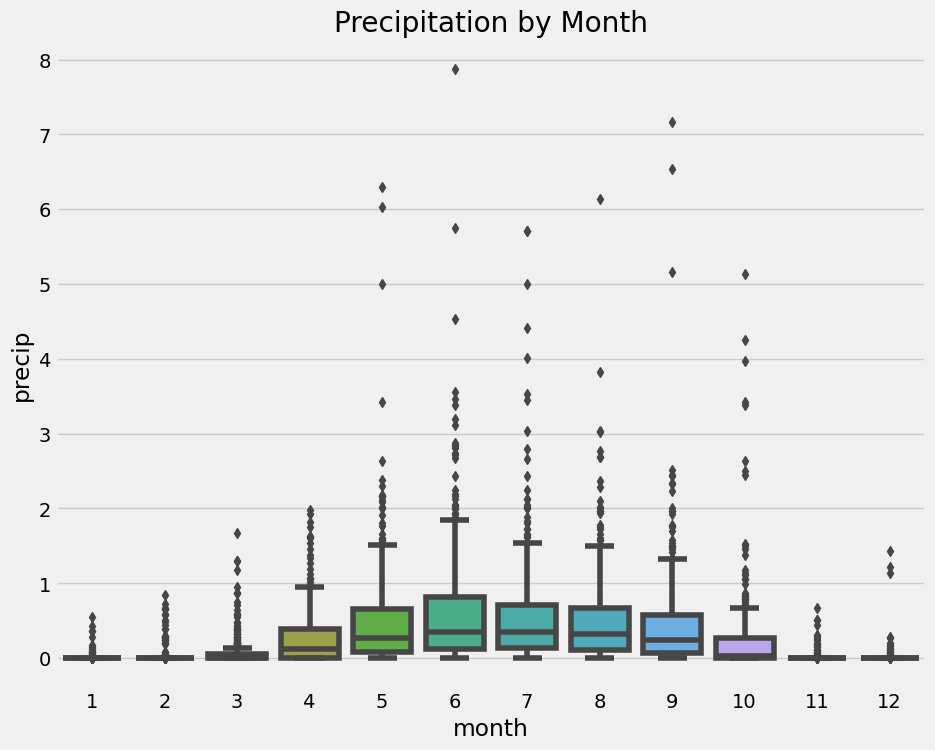

In [24]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=sylhet_daily_weather_child, x='month', y='precip')
ax.set_title('Precipitation by Month')
plt.show()

In [25]:
sylhet_daily_weather_child.columns

Index(['precip', 'humidity', 'tempmax', 'tempmin', 'windspeed', 'cloudcover',
       'Flood', 'quarter', 'month'],
      dtype='object')

In [26]:
train = create_features(train)
test = create_features(test)
FEATURES = ['precip','humidity', 'tempmax', 'tempmin', 'windspeed', 'cloudcover']
TARGET = 'Flood'

In [27]:
X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [28]:
# Booster = gbtree, gblinear, dart
reg = xgb.XGBRegressor(base_score=0.9, booster='gblinear',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=5,
                       learning_rate=0.001)


In [29]:
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=50)

[22:54:42] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[22:54:42] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:0.67775	validation_1-rmse:0.68744
[50]	validation_0-rmse:0.62147	validation_1-rmse:0.62866
[100]	validation_0-rmse:0.58486	validation_1-rmse:0.58967
[150]	validation_0-rmse:0.56057	validation_1-rmse:0.56328
[200]	validation_0-rmse:0.54381	validation_1-rmse:0.54477
[250]	validation_0-rmse:0.53159	validation_1-rmse:0.53114
[300]	validation_0-rmse:0.52214	validation_1-rmse:0.52058
[3

XGBRegressor(base_score=0.9, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, gamma=None, gpu_id=-1,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=1000, n_jobs=0,
             num_parallel_tree=None, objective='reg:linear', predictor=None,
             random_state=0, reg_alpha=0, ...)

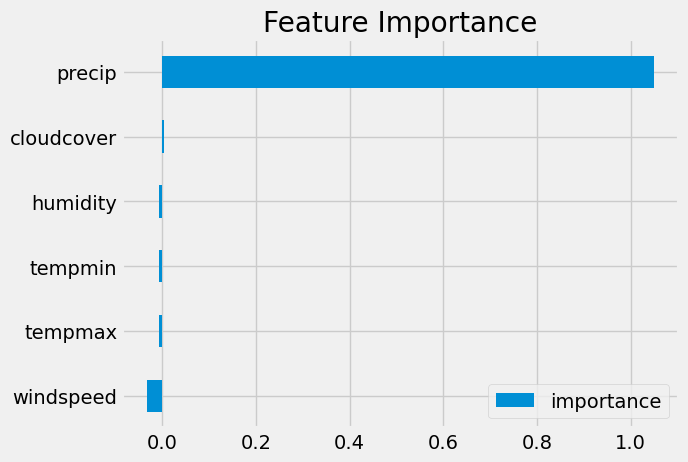

In [30]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [31]:
test['prediction'] = reg.predict(X_test)

In [32]:
sylhet_daily_weather_child_1 = sylhet_daily_weather_child.merge(test[['prediction']], how='left', left_index=True, right_index=True)

In [33]:
sylhet_daily_weather_child_1.head()

,precip,humidity,tempmax,tempmin,windspeed,cloudcover,Flood,quarter,month,prediction
Date,,,,,,,,,,
2013-04-01,0.174,60.2,96.0,73.5,8.1,12.1,1,2,4,NaN
2013-04-02,0.084,60.9,98.3,72.2,8.5,8.6,0,2,4,NaN
2013-04-03,0.072,55.6,100.5,72.9,10.1,10.3,0,2,4,NaN
2013-04-04,0.008,51.7,103.2,73.7,15.4,11.4,0,2,4,NaN
2013-04-05,0.000,45.2,101.9,73.3,13.8,8.8,0,2,4,NaN


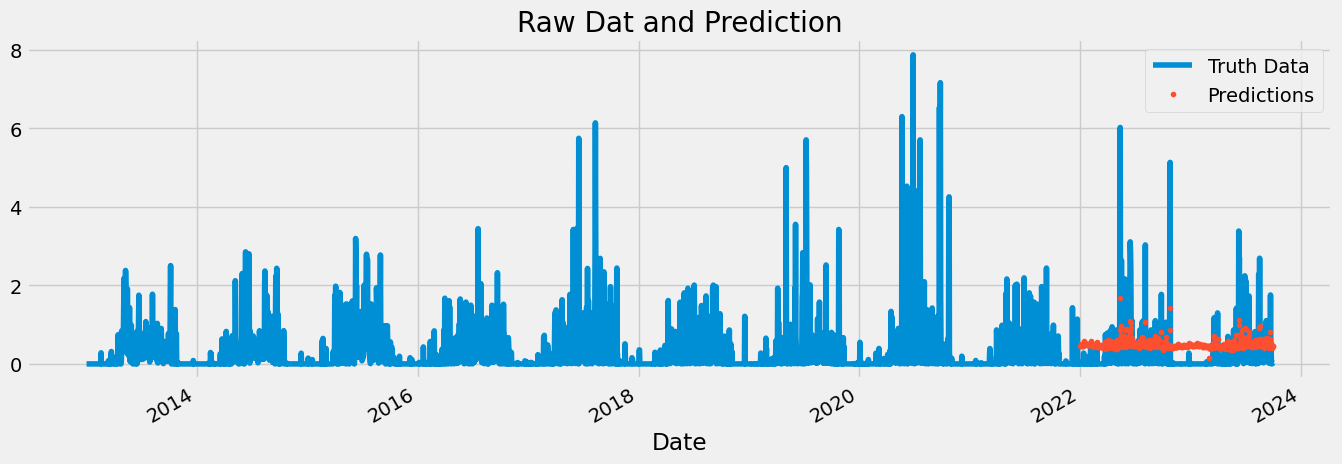

In [34]:
ax = sylhet_daily_weather_child_1[['precip']].plot(figsize=(15, 5))
sylhet_daily_weather_child_1['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

In [36]:
score = np.sqrt(mean_squared_error(test['precip'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 0.52


In [37]:
test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)

date
2022-05-13    0.667344
2023-05-21    0.647113
2023-05-05    0.623351
2022-04-29    0.621954
2023-05-16    0.620756
2022-04-27    0.618763
2023-06-07    0.606350
2023-05-25    0.592240
2023-03-15    0.589422
2023-04-21    0.585091
Name: error, dtype: float64